## Logistic Regression from scratch without using ML libraries like scikit-learn

In [19]:
## Importing important libraries
import pandas as pd
import numpy as np

In [20]:
# 1. Load Titanic Dataset
df = pd.read_csv(r"C:\Users\ASUS\Desktop\cleaned_DataAnalysis\SVMtrain.csv")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [22]:
## Encoding of the Categorical Variables
df['Sex']=df['Sex'].map({'Male':1,'female':0})

In [23]:
## Now Select features
features=['Pclass','Sex','Age','Fare']
df=df[features+['Survived']]

In [24]:
# Split features and target
X = df[features].values
y = df['Survived'].values

In [25]:
## Normalizing of the features
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
## Check if there is missing values in the age
print(df['Age'].isnull().sum())

0


In [27]:
## train-test from scratch without using scikit-learn
import numpy as np

def train_test_split(X,y,test_size=0.2,random_state=None):
    if random_state:
        np.random.seed(random_state)

    indices=np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_count=int(test_size*X.shape[0])

    test_indices=indices[:test_count]
    train_indices=indices[test_count:]

    return X[train_indices],X[test_indices],y[train_indices],y[test_indices]

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
## Defining of the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [30]:
## Binary Cross-Entropy Loss
def compute_loss(y, y_hat):
    m = len(y)
    # Avoid log(0) with epsilon
    epsilon = 1e-15
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    return - (1/m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

In [31]:
## Defining function to train the model
def train_logistic_regression(X, y, lr=0.001, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    losses = []

    for epoch in range(epochs):
        z = np.dot(X, weights) + bias
        y_hat = sigmoid(z)

        # Gradient calculation
        dw = (1/m) * np.dot(X.T, (y_hat - y))
        db = (1/m) * np.sum(y_hat - y)

        # Weight update
        weights -= lr * dw
        bias -= lr * db

        # Record loss
        loss = compute_loss(y, y_hat)
        losses.append(loss)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return weights, bias, losses

In [32]:
## Defining predict function to predict the output
def predict(X, weights, bias, threshold=0.5):
    probs = sigmoid(np.dot(X, weights) + bias)
    return (probs >= threshold).astype(int)


In [33]:
## Defining accuracy function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [34]:
# Train the model
weights, bias, losses = train_logistic_regression(X_train, y_train, lr=0.1, epochs=1000)

# Predict
y_pred = predict(X_test, weights, bias)

# Evaluate
print("Accuracy:", accuracy(y_test, y_pred))

Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.4690
Epoch 200, Loss: 0.4615
Epoch 300, Loss: 0.4601
Epoch 400, Loss: 0.4597
Epoch 500, Loss: 0.4596
Epoch 600, Loss: 0.4596
Epoch 700, Loss: 0.4596
Epoch 800, Loss: 0.4596
Epoch 900, Loss: 0.4596
Accuracy: 0.7966101694915254


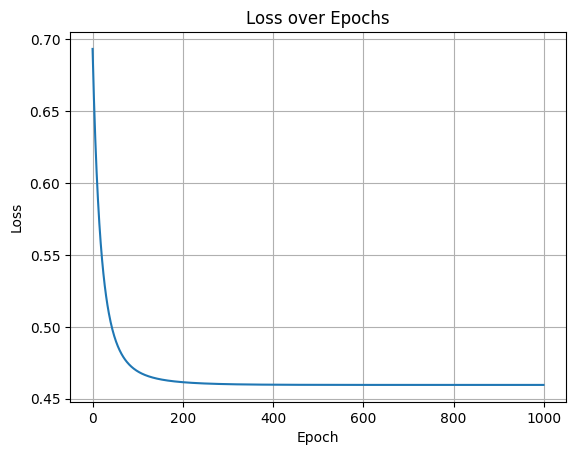

In [35]:
## Visualizing the plot over iterations
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()